# Homework #2

**Group 3**: *Jacqueline Gore, Ethan Chang, Alex Ramirez, Eva Duvaris, Steven Vacha*

*Markdown* **Parctice**

* Bullet Points
* Good way to list things

*You can even link websites* **Like Github**

In [13]:
"https://github.com/jackiegore"

'https://github.com/jackiegore'

*General Explanantion of the code*: This code writes for a visualization of a simple LIF neuron that fires when the membrane potential exceeds the already defined "threshold" put in place. This code shows the neurons response to a step input current then shows the membrane potential changes over a period of time. We have two examples of the possible code to visualize below. 

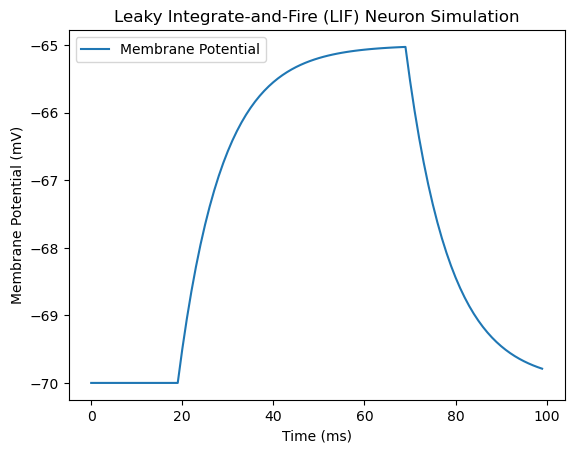

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, tau_m=10, tau_ref=2, v_rest=-70, v_reset=-80, v_threshold=-50, dt=1):
        self.tau_m = tau_m  # Membrane time constant (ms)
        self.tau_ref = tau_ref  # Refractory period (ms)
        self.v_rest = v_rest  # Resting membrane potential (mV)
        self.v_reset = v_reset  # Reset potential after spike (mV)
        self.v_threshold = v_threshold  # Spike threshold (mV)
        self.dt = dt  # Time step (ms)

        self.time = 0  # Initial time
        self.membrane_potential = v_rest  # Initial membrane potential
        self.refractory_time = 0  # Initial refractory time

    def update(self, current_input):
        if self.refractory_time > 0:
            # Neuron is in refractory period
            self.refractory_time -= self.dt
            self.membrane_potential = self.v_reset
        else:
            # Update membrane potential using the leaky integration formula
            dv = (-(self.membrane_potential - self.v_rest) + current_input) / self.tau_m * self.dt
            self.membrane_potential += dv

            # Check for spike
            if self.membrane_potential >= self.v_threshold:
                self.membrane_potential = self.v_reset  # Reset membrane potential
                self.refractory_time = self.tau_ref  # Set refractory period

        self.time += self.dt

# Simulation parameters
sim_time = 100  # Simulation time (ms)
dt = 1  # Time step (ms)

# Input current (step input)
input_current = np.zeros(sim_time)
input_current[20:70] = 5  # Inject a current pulse from time step 20 to 70

# Create an LIF neuron
neuron = LIFNeuron()

# Simulate the LIF neuron
membrane_potentials = []

for current_input in input_current:
    neuron.update(current_input)
    membrane_potentials.append(neuron.membrane_potential)

# Plot the results
time_steps = np.arange(0, sim_time, dt)
plt.plot(time_steps, membrane_potentials, label='Membrane Potential')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.title('Leaky Integrate-and-Fire (LIF) Neuron Simulation')
plt.legend()
plt.show()


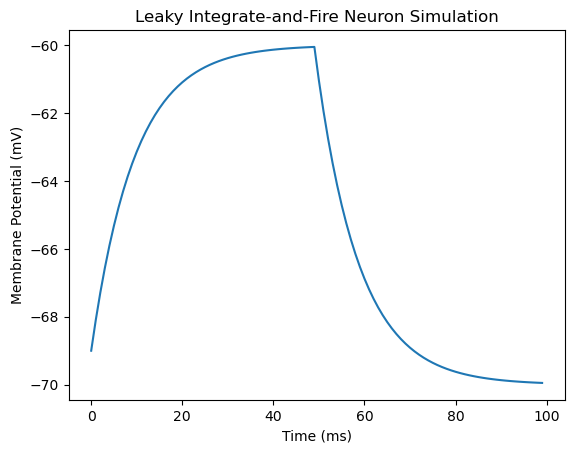

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class LIFNeuron:
    def __init__(self, tau_m, tau_ref, v_rest, v_thresh):
        # Neuron parameters
        self.tau_m = tau_m  # Membrane time constant
        self.tau_ref = tau_ref  # Refractory period
        self.v_rest = v_rest  # Resting potential
        self.v_thresh = v_thresh  # Threshold potential

        # Neuron state variables
        self.membrane_potential = v_rest  # Initial membrane potential
        self.refractory_time = 0  # Initial refractory time

    def update(self, dt, current_input):
        # Check if the neuron is in a refractory period
        if self.refractory_time > 0:
            # Neuron is in refractory period, reset membrane potential to resting potential
            self.refractory_time -= dt
            self.membrane_potential = self.v_rest
        else:
            # Update membrane potential using leaky integration
            dv = (-(self.membrane_potential - self.v_rest) + current_input) / self.tau_m * dt
            self.membrane_potential += dv

            # Check for threshold crossing
            if self.membrane_potential >= self.v_thresh:
                # Neuron has fired, reset membrane potential to resting potential
                self.membrane_potential = self.v_rest
                # Set refractory period
                self.refractory_time = self.tau_ref

        # Return the updated membrane potential
        return self.membrane_potential

# Simulation parameters
tau_m = 10.0  # Membrane time constant (ms)
tau_ref = 2.0  # Refractory period (ms)
v_rest = -70.0  # Resting potential (mV)
v_thresh = -55.0  # Threshold potential (mV)
dt = 1.0  # Time step (ms)
sim_time = 100  # Simulation time (ms)

# Create LIF neuron
neuron = LIFNeuron(tau_m, tau_ref, v_rest, v_thresh)

# Simulation loop
time_points = np.arange(0, sim_time, dt)
membrane_potentials = []

for t in time_points:
    # Inject a constant input current for demonstration purposes
    input_current = 10.0 if t < 50 else 0.0

    # Update neuron and store membrane potential
    membrane_potential = neuron.update(dt, input_current)
    membrane_potentials.append(membrane_potential)

# Plot results
plt.plot(time_points, membrane_potentials)
plt.title('Leaky Integrate-and-Fire Neuron Simulation')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.show()

**What aspect of this model is most unlike a real biological neuron? What is missing?**
The falling of the membrane potential around 70 ms is unlike a biological neuron. It does not account for real biological processes and things like ion channels. This visualization also does not show the adaptation of real neurons over time as it only shows one firing potential. 

**What was the most challenging aspect of this homework?**
Getting the code to run was complicated for some reason.

**Estimate how long it took you to complete this homework**
A little over an hour.